In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Epsilon-greedy

In [2]:
# Инициализация класса бандита
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0 / self.N) * self.mean + 1.0 / self.N * x

In [3]:
# Жадный алгоритм
def greedy_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  for i in range(N):
    # Epsilion greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)

    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    data[i] = x
  cum_average = np.cumsum(data) / (np.arange(N) + 1)

  plt.plot(cum_average)
  plt.plot(np.ones(N) * m1)
  plt.plot(np.ones(N) * m2)
  plt.plot(np.ones(N) * m3)

  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(f'mean: {round(b.mean, 4)}')

  return cum_average


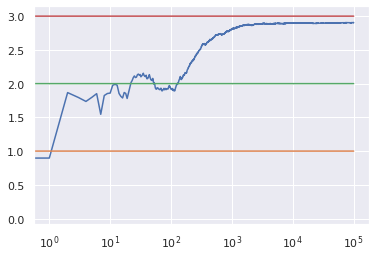

mean: 1.0086
mean: 2.0197
mean: 3.0038


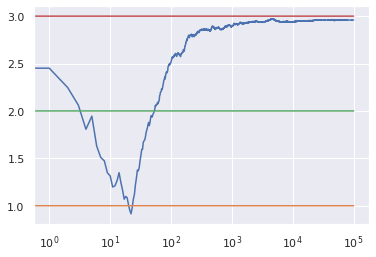

mean: 0.9847
mean: 2.0292
mean: 3.0095


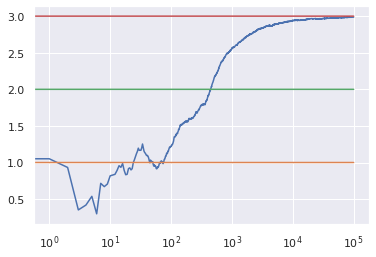

mean: 0.9762
mean: 2.0012
mean: 3.0003


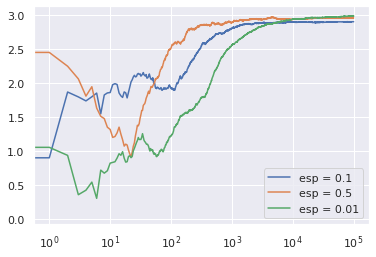

In [4]:
c_1 = greedy_experiment(1, 2, 3, 0.1, 100000)
c_5 = greedy_experiment(1, 2, 3, 0.05, 100000)
c_01 = greedy_experiment(1, 2, 3, 0.01, 100000)

# log scale plot 
plt.plot(c_1, label='esp = 0.1')
plt.plot(c_5, label='esp = 0.5')
plt.plot(c_01, label='esp = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

# Optimistic Initial Value (OIV)

In [5]:
class Bandit_OIV:
  def __init__(self, m, upper_limit):
    self.m = m
    self.mean = upper_limit
    self.N = 1

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1 / self.N) * self.mean + 1 / self.N * x

In [6]:
# алгоритм оптимистичных начальных значений
def run_experient(m1, m2, m3, N, upper_limit=10):
  bandits = [Bandit_OIV(m1, upper_limit), Bandit_OIV(m2, upper_limit), Bandit_OIV(m3, upper_limit)]
  data = np.empty(N)

  for i in range(N):
    # optimistic value
    j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    data[i] = x
  cum_average = np.cumsum(data) / (np.arange(N) + 1)
  
  plt.plot(cum_average)
  plt.plot(np.ones(N) * m1)
  plt.plot(np.ones(N) * m2)
  plt.plot(np.ones(N) * m3)

  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(f'mean: {round(b.mean, 4)}')

  return cum_average


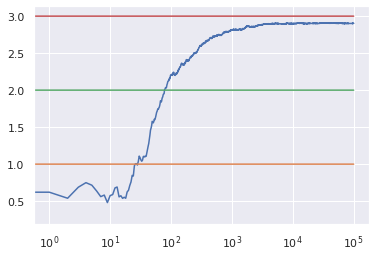

mean: 1.0269
mean: 2.0156
mean: 3.0022


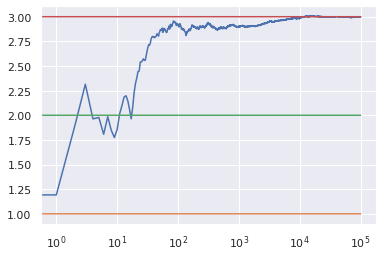

mean: 2.7338
mean: 2.7489
mean: 2.9979


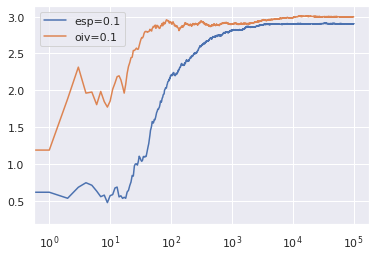

In [7]:
c_1 = greedy_experiment(1, 2, 3, 0.1, 100000)
oiv = run_experient(1, 2, 3, 100000)

# log scale plot 
plt.plot(c_1, label='esp=0.1')
plt.plot(oiv, label='oiv=0.1')
plt.legend()
plt.xscale('log')
plt.show()

# Upper confidence bound (UCB1)

In [8]:
EPS = 1

class Bandit_UCB:
  def __init__(self, p):
    # p: win rate
    self.p = p
    self.p_istmate = 0
    self.N = 0

  def pull(self):
    # draw probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1
    self.p_istmate = ((self.N - 1) * self.p_istmate + x) / self.N

def usb(mean, n, nj):
  return mean + np.sqrt(2 * np.log(n) / nj)


In [11]:
# алгоритм доверительных интервалов
def usb_experiment(m1, m2, m3, N=100000):
  BANDIT_PROBABILITIES = [m1, m2, m3]
  bandits = [Bandit_UCB(p) for p in BANDIT_PROBABILITIES]
  rewards = np.empty(N)
  total_plays = 0

  # initialization: play each bandit once
  for j in range(len(bandits)):
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

  for i in range(N):
    j = np.argmax([usb(b.p_istmate, total_plays, b.N) for b in bandits])
    x = bandits[j].pull()
    total_plays  += 1
    bandits[j].update(x)

    rewards[i] = x
  cum_average = np.cumsum(rewards) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cum_average)
  plt.plot(np.ones(N) * np.max(BANDIT_PROBABILITIES))
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(f'b.p_estimate: {round(b.p_istmate, 4)}')

  print(f'\nTotal reward earned: {rewards.sum()}')
  print(f'Overall win rate: {rewards.sum() / N}')
  print(f'Num times selected each bandit: {[b.N for b in bandits]}')

  return cum_average

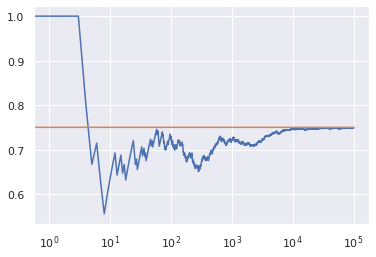

b.p_estimate: 0.1857
b.p_estimate: 0.5058
b.p_estimate: 0.7502

Total reward earned: 74897.0
Overall win rate: 0.74897
Num times selected each bandit: [70, 342, 99591]


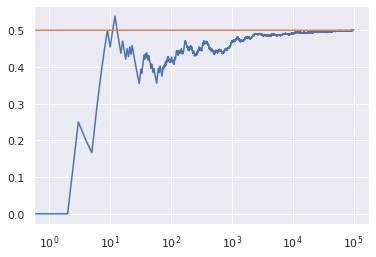

b.p_estimate: 0.2085
b.p_estimate: 0.5018
b.p_estimate: 0.4991

Total reward earned: 49997.0
Overall win rate: 0.49997
Num times selected each bandit: [235, 56651, 43117]


array([0.      , 0.      , 0.      , ..., 0.49998 , 0.499975, 0.49997 ])

In [13]:
# 
usb_experiment(0.2, 0.5, 0.75)
usb_experiment(0.2, 0.5, 0.5)